# Setup
Setting up the simulation requires the following data/configuration:
#### [Cluster generation](#cluster_generation)
Using `hpconfig` either as a JSON creator, or to produce an intermediary dictionary (preferred)

#### [Observation schedule generation ](#observation_generation) (In Progress)
Observations schedule describes the ingest and data that will be moving across the system during the simulation 

#### [Pipeline generation](#pipeline_generation) (In Progress)
   * `topsim_pipelines` will generate costs for the workflows that match for the HPSOs in the observation schedule

#### [Telescope generation](#telescope_generation)

Telescope configuration: Information on what the size of the instrument (e.g. number of antennas, number of resources used at Ingest, and descriptions of the pipelines that are used during ingest).
    * Telescope generation occurs at the end of the process, as it involves wrapping all the other dictionaries into one final JSON-serializable dictionary
    
#### [Simulation Visualisation](#sim_vis)

In [3]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../thesis_experiments'))
sys.path.insert(0, os.path.abspath('../../topsim_pipelines'))

## Cluster generation<a id=cluster_generation></a>
Cluster generation is acheived through the `hpconfig` tool, which provides a command-line interface, or a class-based approach to producing a JSON-ready dictionary:

In [4]:
from hpconfig.specs.pawsey.galaxy import GalaxyNoGPU
cluster = GalaxyNoGPU().create_config_dict()
# Let's see what the cluster looks like
cluster['cluster']['header']

{'time': 'false',
 'generator': 'hpconfig',
 'architecture': {'cpu': {'XeonIvyBridge': 50, 'XeonSandyBridge': 100},
  'gpu': {}}}

## Observation generation

The mid-term schedule is formed by a list of observations, each of which is assocated with a HPSO and corresponding processing pipeline(s). The challenge we have in this situation is that observation scheduling for telescopes is non-trivial (it is another scheduling problem in NP), and the constraints and observation details for the SKA are still to be decided. For the purpose of TOpSim and these experiments, we need to demonstrate how different combinations of observations in a schedule are will look on the system; this could be done randomly, or with specific scheduling constraints imposed on a sequence of observations. 

We need to translated each of these into something like: 

In [5]:
"""
"observations": [
    {
    "name": "observation1",
    "start": 0,
    "duration": 30, # Time is in minutes, 0.1 of 5hours 
    "demand": 36,
    "workflow": "drepa_worklow_config_file.json",
    "type": "drepa",
    "data_product_rate": 3.79 ## This is petaflops/minute
    },
    ....
"""

'\n"observations": [\n    {\n    "name": "observation1",\n    "start": 0,\n    "duration": 30, # Time is in minutes, 0.1 of 5hours \n    "demand": 36,\n    "workflow": "drepa_worklow_config_file.json",\n    "type": "drepa",\n    "data_product_rate": 3.79 ## This is petaflops/minute\n    },\n    ....\n'

## Pipeline Generation<a id=pipeline_generation></a>
Pipeline generation involves the following steps:

1. Use the [EAGLE](https://eagle.icrar.org) online editor to produce a Logical Graph Template (LGT). 
2. 

## Simulation Visualisation<a id=sim_vis></a>

In [1]:
import os
import logging
import simpy
import time

In [4]:
from topsim.core.simulation import Simulation
from topsim.core.delay import DelayModel
from user.telescope import Telescope
from user.scheduling import GreedyAlgorithmFromPlan

In [11]:
logging.basicConfig(level="DEBUG")
LOGGER = logging.getLogger(__name__)

os.chdir('/home/rwb/github/thesis_experiments')
fseries = 'visualisation_playground/series_observations.json'
fparallel =  'visualisation_playground/parallel_observations.json'
config = [fseries,fparallel]
for f in config:
    env = simpy.Environment()
#     dm = DelayModel(0.10, 'normal', DelayModel.DelayDegree.LOW)
    dm = None
    instrument = Telescope
    timestamp = f'{time.time()}'.split('.')[0]
    cfg = f.split('/')[-1]
    simulation = Simulation(
        env=env,
        config=f,
        instrument=instrument,
        algorithm_map={'heft': 'heft','fcfs':'fcfs', 'fifo': GreedyAlgorithmFromPlan},
        delay=dm,
        timestamp=f'visualisation_playground/results/{cfg}-{timestamp}'
    )
    simulation.start(-1)

INFO:user.telescope:Observation emu1 scheduled for 0
INFO:user.telescope:telescope is now using 18 arrays
INFO:topsim.core.scheduler:Time on Scheduler: 0
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 1
INFO:topsim.core.buffer:HotBuffer: [247] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 2
INFO:topsim.core.buffer:HotBuffer: [244] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 3
INFO:topsim.core.buffer:HotBuffer: [241] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 4
INFO:topsim.core.buffer:HotBuffer: [238] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 5
INFO:topsim.core.buffer:HotBuffer: [235] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 6
INFO:topsim.core.buffer:HotBuffer: [232] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 7
INFO:topsim.core.buffer:HotBuffer: [229] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Tim

INFO:topsim.core.scheduler:Allocation emu2_10_c7_1-cat0_m14 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 43
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 44
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 45
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 46
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 47
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 48
INFO:topsim.core.scheduler:Allocation emu2_10_c3_1-cat0_m0 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 49
INFO:topsim.core.scheduler:Allocation emu2_10_c5_1-cat0_m1 made to cluster
INFO:topsim

INFO:topsim.core.scheduler:Time on Scheduler: 89
INFO:topsim.core.scheduler:Allocation emu2_10_c5_3-cat0_m1 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 90
INFO:topsim.core.scheduler:Allocation emu2_10_c0_3-cat0_m2 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 91
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 92
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 93
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 94
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 95
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 96
INFO:topsim.core.scheduler:Allocation 

INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 134
INFO:topsim.core.scheduler:Allocation emu1_0_c0_4-cat0_m15 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 135
INFO:topsim.core.scheduler:Allocation emu2_10_c2_6-cat0_m19 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 136
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 137
INFO:topsim.core.scheduler:Allocation emu2_10_c8_6-cat0_m12 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 138
INFO:topsim.core.scheduler:Allocation emu1_0_c4_6-cat0_m13 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 139
INFO:topsim.core.scheduler:Allocation 

INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 178
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 179
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 180
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 181
INFO:topsim.core.scheduler:Allocation emu2_10_c9_8-cat0_m3 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c6_6-cat0_m4 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 182
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 183
INFO:topsim.core.scheduler:Allocation emu2_10_c2_8-cat0_m19 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 184
INFO:

INFO:topsim.core.scheduler:Allocation emu2_10_c6_10-cat0_m6 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 221
INFO:topsim.core.scheduler:Allocation emu2_10_c7_10-cat0_m0 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c8_8-cat0_m1 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 222
INFO:topsim.core.scheduler:Allocation emu2_10_c8_11-cat0_m3 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c1_8-cat0_m17 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 223
INFO:topsim.core.scheduler:Allocation emu2_10_c2_11-cat0_m11 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c3_8-cat0_m18 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 224
INFO:topsim.core.scheduler:Allo

INFO:topsim.core.scheduler:Allocation emu2_10_c2_13-cat0_m9 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 260
INFO:topsim.core.scheduler:Allocation emu2_10_c6_12-cat0_m1 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c3_11-cat0_m6 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 261
INFO:topsim.core.scheduler:Allocation emu2_10_c7_12-cat0_m7 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c1_11-cat0_m8 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 262
INFO:topsim.core.scheduler:Allocation emu2_10_c3_13-cat0_m19 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c7_11-cat0_m0 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 263
INFO:topsim.core.scheduler:All

INFO:topsim.core.scheduler:Allocation emu1_0_c9_14-cat0_m10 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 300
INFO:topsim.core.scheduler:Allocation emu2_10_c5_15-cat0_m19 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c0_14-cat0_m17 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 301
INFO:topsim.core.scheduler:Allocation emu2_10_c0_15-cat0_m12 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c8_14-cat0_m2 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 302
INFO:topsim.core.scheduler:Allocation emu2_10_c6_15-cat0_m11 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c4_15-cat0_m16 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 303
INFO:topsim.core.scheduler

INFO:topsim.core.scheduler:Allocation emu2_10_c1_18-cat0_m13 made to cluster
INFO:topsim.core.scheduler:Allocation emu1_0_c5_16-cat0_m7 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 338
INFO:topsim.core.scheduler:Allocation emu2_10_c0_18-cat0_m14 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 339
INFO:topsim.core.scheduler:Allocation emu1_0_c9_16-cat0_m2 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 340
INFO:topsim.core.scheduler:Allocation emu1_0_c0_16-cat0_m10 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 341
INFO:topsim.core.scheduler:Allocation emu1_0_c8_16-cat0_m17 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler

INFO:topsim.core.simulation:Simulation Finished @ 393.0
INFO:user.telescope:Observation emu1 scheduled for 0
INFO:user.telescope:telescope is now using 18 arrays
INFO:user.telescope:Observation emu2 scheduled for 0
INFO:user.telescope:telescope is now using 36 arrays
INFO:topsim.core.scheduler:Time on Scheduler: 0
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 1
INFO:topsim.core.buffer:HotBuffer: [245] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 2
INFO:topsim.core.buffer:HotBuffer: [240] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 3
INFO:topsim.core.buffer:HotBuffer: [235] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 4
INFO:topsim.core.buffer:HotBuffer: [230] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 5
INFO:topsim.core.buffer:HotBuffer: [225] 
ColdBuffer: [400]
INFO:topsim.core.scheduler:Time on Scheduler: 6
INFO:topsim.core.buffer:HotBuffer: [

INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 42
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 43
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 44
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 45
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 46
INFO:topsim.core.scheduler:Allocation emu1_0_c0_1-cat0_m15 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 47
INFO:topsim.core.scheduler:Allocation emu1_0_c6_0-cat0_m16 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 48
INFO:topsim.core.scheduler:Allocation emu1_0_c7_0-cat0_m17 made to cluster
INFO:topsim.

INFO:topsim.core.scheduler:Time on Scheduler: 89
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 90
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 91
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 92
INFO:topsim.core.scheduler:Allocation emu1_0_c2_3-cat0_m16 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 93
INFO:topsim.core.scheduler:Allocation emu1_0_c8_3-cat0_m17 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 94
INFO:topsim.core.scheduler:Allocation emu1_0_c4_4-cat0_m0 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c8_0-cat0_m18 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 9

INFO:topsim.core.scheduler:Allocation emu2_0_c9_5-cat0_m6 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 132
INFO:topsim.core.scheduler:Allocation emu1_0_c5_6-cat0_m13 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c2_5-cat0_m11 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 133
INFO:topsim.core.scheduler:Allocation emu1_0_c9_6-cat0_m4 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c7_5-cat0_m8 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 134
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 135
INFO:topsim.core.scheduler:Allocation emu2_0_c8_5-cat0_m17 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 136
INF

INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 176
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 177
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 178
INFO:topsim.core.scheduler:Allocation emu2_0_c8_7-cat0_m17 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 179
INFO:topsim.core.scheduler:Allocation emu2_0_c3_7-cat0_m9 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 180
INFO:topsim.core.scheduler:Allocation emu1_0_c5_8-cat0_m0 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c0_7-cat0_m13 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 181
INFO:topsim.core.scheduler:Allocation emu1

INFO:topsim.core.scheduler:Allocation emu1_0_c2_10-cat0_m15 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c1_8-cat0_m11 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 220
INFO:topsim.core.scheduler:Allocation emu1_0_c6_10-cat0_m3 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c4_10-cat0_m17 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 221
INFO:topsim.core.scheduler:Allocation emu1_0_c7_10-cat0_m9 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c8_9-cat0_m2 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 222
INFO:topsim.core.scheduler:Allocation emu1_0_c1_10-cat0_m12 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c3_9-cat0_m10 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:top

INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 260
INFO:topsim.core.scheduler:Allocation emu1_0_c6_12-cat0_m15 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c4_12-cat0_m3 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 261
INFO:topsim.core.scheduler:Allocation emu1_0_c7_12-cat0_m17 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 262
INFO:topsim.core.scheduler:Allocation emu1_0_c1_12-cat0_m8 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 263
INFO:topsim.core.scheduler:Allocation emu1_0_c3_13-cat0_m0 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 264
INFO:topsim.core.scheduler:Allocation emu1_0_c5_13-cat0_m7 made to cluste

INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 299
INFO:topsim.core.scheduler:Allocation emu2_0_c1_14-cat0_m8 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 300
INFO:topsim.core.scheduler:Allocation emu1_0_c3_15-cat0_m3 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 301
INFO:topsim.core.scheduler:Allocation emu1_0_c5_15-cat0_m0 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 302
INFO:topsim.core.scheduler:Allocation emu1_0_c6_15-cat0_m7 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c4_15-cat0_m19 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 303
INFO:topsim.core.scheduler:Allocation emu1_0_c7_15-cat0_m5 made to cluster

INFO:topsim.core.scheduler:Allocation emu1_0_c2_18-cat0_m13 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c5_16-cat0_m6 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 338
INFO:topsim.core.scheduler:Allocation emu1_0_c1_18-cat0_m18 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c6_16-cat0_m14 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 339
INFO:topsim.core.scheduler:Allocation emu1_0_c6_18-cat0_m2 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c1_16-cat0_m3 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:topsim.core.scheduler:Time on Scheduler: 340
INFO:topsim.core.scheduler:Allocation emu1_0_c8_18-cat0_m10 made to cluster
INFO:topsim.core.scheduler:Allocation emu2_0_c9_17-cat0_m15 made to cluster
INFO:topsim.core.buffer:HotBuffer: [250] 
ColdBuffer: [350]
INFO:

In [5]:
os.chdir('/home/rwb/github/thesis_experiments')


In [12]:
ls visualisation_playground/results

mos_sw20_lw40.json-1619683271-heft-GreedyAlgorithmFromPlan-sim.pkl
mos_sw20_lw40.json-1619683271-heft-GreedyAlgorithmFromPlan-tasks.pkl
mos_sw30_lw40.json-1619683566-heft-GreedyAlgorithmFromPlan-sim.pkl
mos_sw30_lw40.json-1619683566-heft-GreedyAlgorithmFromPlan-tasks.pkl
mos_sw30_lw40.json-1619683587-heft-GreedyAlgorithmFromPlan-sim.pkl
mos_sw30_lw40.json-1619683587-heft-GreedyAlgorithmFromPlan-tasks.pkl
mos_sw40_lw80.json-1619680221-heft-GreedyAlgorithmFromPlan-sim.pkl
mos_sw40_lw80.json-1619680221-heft-GreedyAlgorithmFromPlan-tasks.pkl
mos_sw50_lw100.json-1619681375-heft-GreedyAlgorithmFromPlan-sim.pkl
mos_sw50_lw100.json-1619681375-heft-GreedyAlgorithmFromPlan-tasks.pkl
parallel_observations.json-1619702848-heft-GreedyAlgorithmFromPlan-sim.pkl
parallel_observations.json-1619702848-heft-GreedyAlgorithmFromPlan-tasks.pkl
parallel_observations.json-1619744679-heft-GreedyAlgorithmFromPlan-sim.pkl
parallel_observations.json-1619744679-heft-GreedyAlgorithmFromPlan-tasks.pkl
parallel_obser

In [7]:
logging.basicConfig(level="INFO")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
series = "visualisation_playground/results/series_observations.json-1619744647-heft-GreedyAlgorithmFromPlan-sim.pkl"
parallel = "visualisation_playground/results/parallel_observations.json-1619744679-heft-GreedyAlgorithmFromPlan-sim.pkl"
series_df = pd.read_pickle(series)
parallel_df = pd.read_pickle(parallel)

In [ ]:
series_df[series_df['available_resources']>]

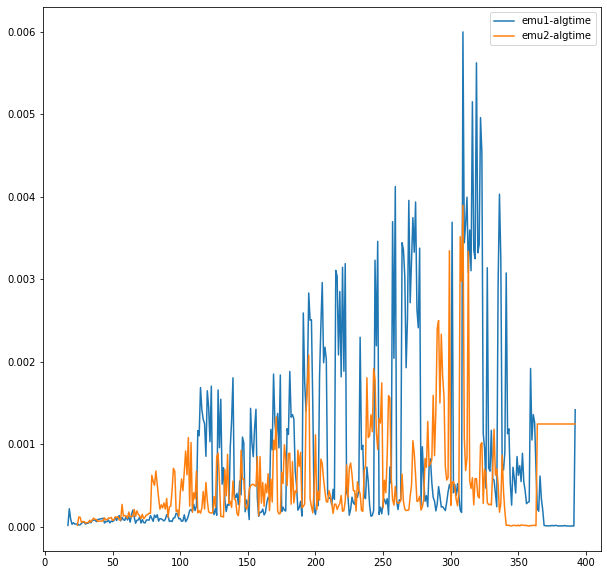

In [31]:
series_df[['emu1-algtime','emu2-algtime']].plot(figsize=(10,10))

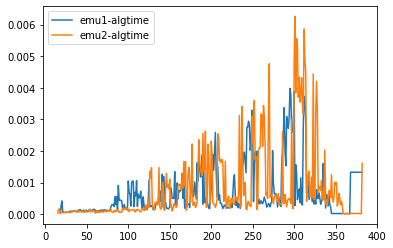

In [28]:
parallel_df[['emu1-algtime','emu2-algtime']].plot()

In [ ]:
series_tasks_df = pd.read_pickle("visualisation_playground/results/series_observations.json-1619744647-heft-GreedyAlgorithmFromPlan-tasks.pkl")
series_tasks_df = series_tasks_df.T

series_tasks_df['time_diff'] = series_tasks_df['aft']-series_tasks_df['eft']


In [167]:
series_sim_df = pd.read_pickle("visualisation_playground/results/series_observations.json-1620100399-heft-GreedyAlgorithmFromPlan-sim.pkl")
parallel_sim_df = pd.read_pickle("visualisation_playground/results/parallel_observations.json-1620100412-heft-GreedyAlgorithmFromPlan-sim.pkl")

series_tasks_df = pd.read_pickle("visualisation_playground/results/series_observations.json-1620100399-heft-GreedyAlgorithmFromPlan-tasks.pkl")
parallel_tasks_df = pd.read_pickle("visualisation_playground/results/parallel_observations.json-1620100412-heft-GreedyAlgorithmFromPlan-tasks.pkl")

series_tasks_df = series_tasks_df.T
parallel_tasks_df = parallel_tasks_df.T

series_tasks_df['time_diff'] = series_tasks_df['aft']-series_tasks_df['ast']
series_tasks_df['time_diff'] = series_tasks_df['time_diff'].astype('float')
parallel_tasks_df['time_diff'] = parallel_tasks_df['aft']-parallel_tasks_df['ast']
parallel_tasks_df['time_diff'] = parallel_tasks_df['time_diff'].astype('float')

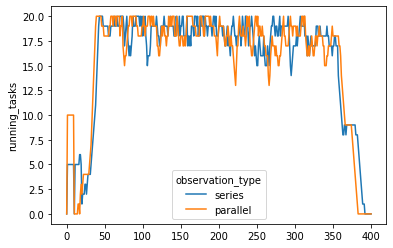

In [174]:
# fig, axs = plt.subplots(ncols=2)
# axs[0].set_title('Series observations')
# axs[1].set_title('Parallel observations')
# sns.kdeplot(data=series_tasks_df,x='time_diff',hue='observation_id', fill=True,ax=axs[0])
# sns.kdeplot(data=parralell_tasks_df,x='time_diff',hue='observation_id', fill=True,ax=axs[1])
dflist = [series_sim_df, parallel_sim_df]
xaxis = [x for x in range(0,2*401)]
for df in dflist:
    tmp = [x for x in range(len(df),401)]
    for x in tmp:
        df.loc[x] = 0
dflist[1]
dflist[0]['observation_type'] = 'series'
dflist[1]['observation_type'] = 'parallel'

dfcombined = dflist[0].append(dflist[1])
dfcombined
sns.lineplot(data=dfcombined, x=dfcombined.index, y=dfcombined['running_tasks'],hue='observation_type')
# # sns.lineplot(data=dflist[1], x=xaxis, y=dflist[1]['running_tasks'])

In [ ]:
dfcombined

512/4 = 4 different arrays
long and short baselines in the observations.
i/o for task duration 

Task duration currently FLOPS/
Preprocessing for task cost FLOPS/byte 
Runtime presentation

hot buffer : cold buffer = 9:1 